In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
####################################################
# Load the data
df = pd.read_csv("n/full_data_flightdelay.csv.xz", compression='xz')
# df = pd.read_csv("test.csv.xz", compression='xz')
#print(df.head())

# take a random sample of 1000 rows
df = df.sample(n=10000)

ontime = df[df['DEP_DEL15'] == 0]
delayed = df[df['DEP_DEL15'] == 1]

In [ ]:
df.shape


(10000, 26)

In [75]:
df.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,...,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.564400,3.935300,0.191900,3.846000,3.063200,27.775300,133.79930,12646.084900,63076.129500,3460.477100,...,0.000097,0.000135,11.467800,36.743270,-94.186917,0.100887,0.035690,0.093370,71.161360,8.349877
std,3.417078,1.993969,0.393815,2.392082,1.761226,21.534674,46.24736,8860.894673,34535.154911,4290.411741,...,0.000086,0.000046,6.911956,5.443683,17.806650,0.363128,0.348068,0.713713,18.427342,3.629147
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,44.00000,1100.000000,5582.000000,2.000000,...,0.000000,0.000007,0.000000,19.739000,-159.346000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4.000000,2.000000,0.000000,2.000000,2.000000,11.000000,90.00000,5306.000000,25034.000000,635.000000,...,0.000034,0.000099,5.000000,33.436000,-106.377000,0.000000,0.000000,0.000000,59.000000,5.820000
50%,7.000000,4.000000,0.000000,3.000000,3.000000,23.000000,143.00000,11500.000000,70878.000000,2240.500000,...,0.000062,0.000125,12.000000,37.505000,-87.906000,0.000000,0.000000,0.000000,74.000000,7.830000
75%,10.000000,6.000000,0.000000,5.000000,4.000000,39.000000,172.00000,17522.000000,86312.000000,4806.000000,...,0.000144,0.000177,17.000000,40.779000,-80.936000,0.020000,0.000000,0.000000,86.000000,10.290000
max,12.000000,7.000000,1.000000,11.000000,12.000000,109.000000,337.00000,35256.000000,117728.000000,21837.000000,...,0.000348,0.000229,32.000000,61.169000,-70.304000,11.630000,8.500000,18.900000,115.000000,28.190000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1866883 to 4201534
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MONTH                          10000 non-null  int64  
 1   DAY_OF_WEEK                    10000 non-null  int64  
 2   DEP_DEL15                      10000 non-null  int64  
 3   DEP_TIME_BLK                   10000 non-null  object 
 4   DISTANCE_GROUP                 10000 non-null  int64  
 5   SEGMENT_NUMBER                 10000 non-null  int64  
 6   CONCURRENT_FLIGHTS             10000 non-null  int64  
 7   NUMBER_OF_SEATS                10000 non-null  int64  
 8   CARRIER_NAME                   10000 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH          10000 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          10000 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  10000 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       10000 non-nu

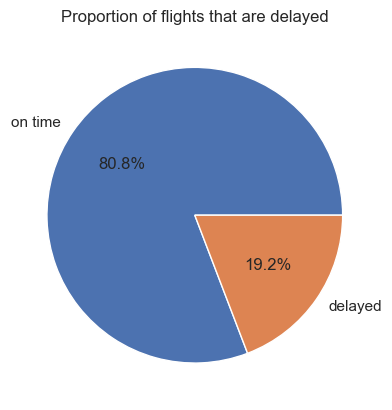

In [77]:
plt.pie(df['DEP_DEL15'].value_counts(), labels=['on time', 'delayed'], autopct='%1.1f%%')
plt.title('Proportion of flights that are delayed')
plt.show()

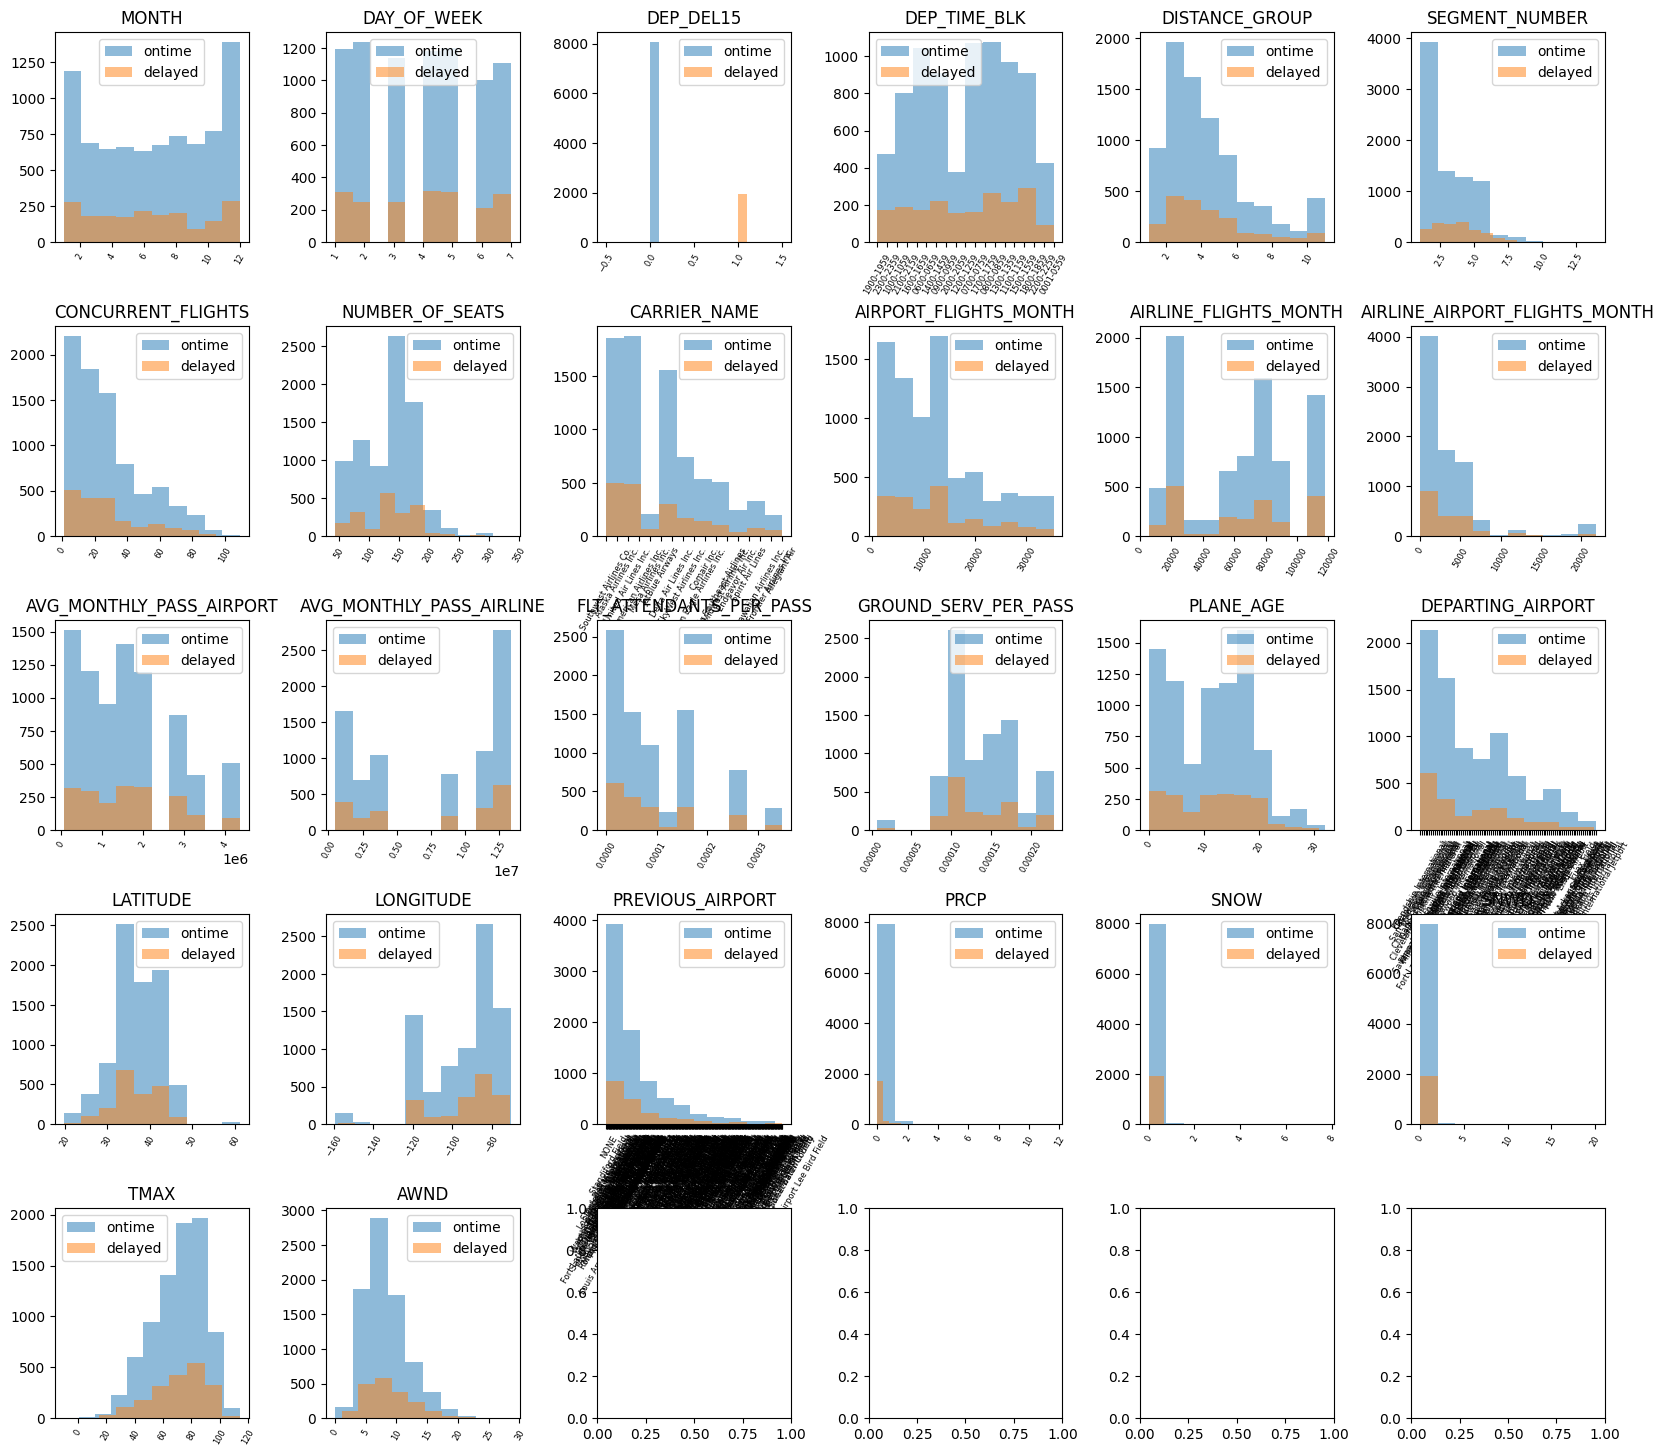

In [2]:
# Inital EDA
# Plot the columns of the ontime and delayed flights and compare, put all the plots in the same figure
# Create a figure with 5 rows and 6 columns which are well spaced
fig, axs = plt.subplots(5, 6, figsize=(20, 18))

for i, col in enumerate(df.columns):
    ax = axs[i // 6, i % 6]
    ax.hist(ontime[col], alpha=0.5, label='ontime')
    ax.hist(delayed[col], alpha=0.5, label='delayed')
    ax.tick_params(axis='x', rotation=60, labelsize=6)
    ax.set_title(col)
    ax.legend()
plt.subplots_adjust(wspace=0.4, hspace=0.4)
# plt.savefig('flights.png')
plt.show()

In [ ]:
# DATA CLEANING
# encode the categorical data
le = LabelEncoder()

def clean_labels_encoder(list_of_labels, df):
    for label in list_of_labels:
        df[label] = le.fit_transform(df[label])
    return df

# clean the labels
list_of_labels = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT', 'DEP_TIME_BLK']
df = clean_labels_encoder(list_of_labels, df)

# Drop the columns that are not needed
# df = df.drop(['CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
#        'DEP_BLOCK_HIST'], axis=1)

# Fill the missing values
df.fillna(df.mean(), inplace=True)


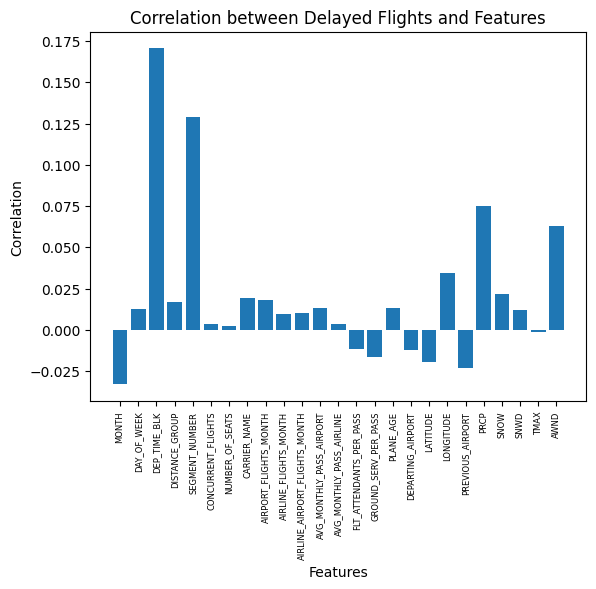

DEP_TIME_BLK                     0.170501
SEGMENT_NUMBER                   0.128818
PRCP                             0.075043
AWND                             0.063031
LONGITUDE                        0.034599
SNOW                             0.021876
CARRIER_NAME                     0.019102
AIRPORT_FLIGHTS_MONTH            0.017935
DISTANCE_GROUP                   0.016922
AVG_MONTHLY_PASS_AIRPORT         0.013436
PLANE_AGE                        0.013000
DAY_OF_WEEK                      0.012749
SNWD                             0.012247
AIRLINE_AIRPORT_FLIGHTS_MONTH    0.010024
AIRLINE_FLIGHTS_MONTH            0.009547
CONCURRENT_FLIGHTS               0.003713
AVG_MONTHLY_PASS_AIRLINE         0.003358
NUMBER_OF_SEATS                  0.002014
TMAX                            -0.001312
FLT_ATTENDANTS_PER_PASS         -0.011411
DEPARTING_AIRPORT               -0.012543
GROUND_SERV_PER_PASS            -0.016537
LATITUDE                        -0.019316
PREVIOUS_AIRPORT                -0

In [4]:
# FEATURE ENGINEERING
# Calculate the correlation between DEP_DEL15 and the other columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()['DEP_DEL15']
correlation = correlation.drop(['DEP_DEL15'])


#print(correlation)

# Plot the correlation
plt.bar(correlation.index, correlation)
plt.xticks(rotation=90)
plt.tick_params(axis='x', rotation=90, labelsize=6)
plt.ylabel('Correlation')
plt.xlabel('Features')
plt.title("Correlation between Delayed Flights and Features")
plt.show()


# Sort the correlation
correlation = correlation.sort_values(ascending=False)
print(correlation)

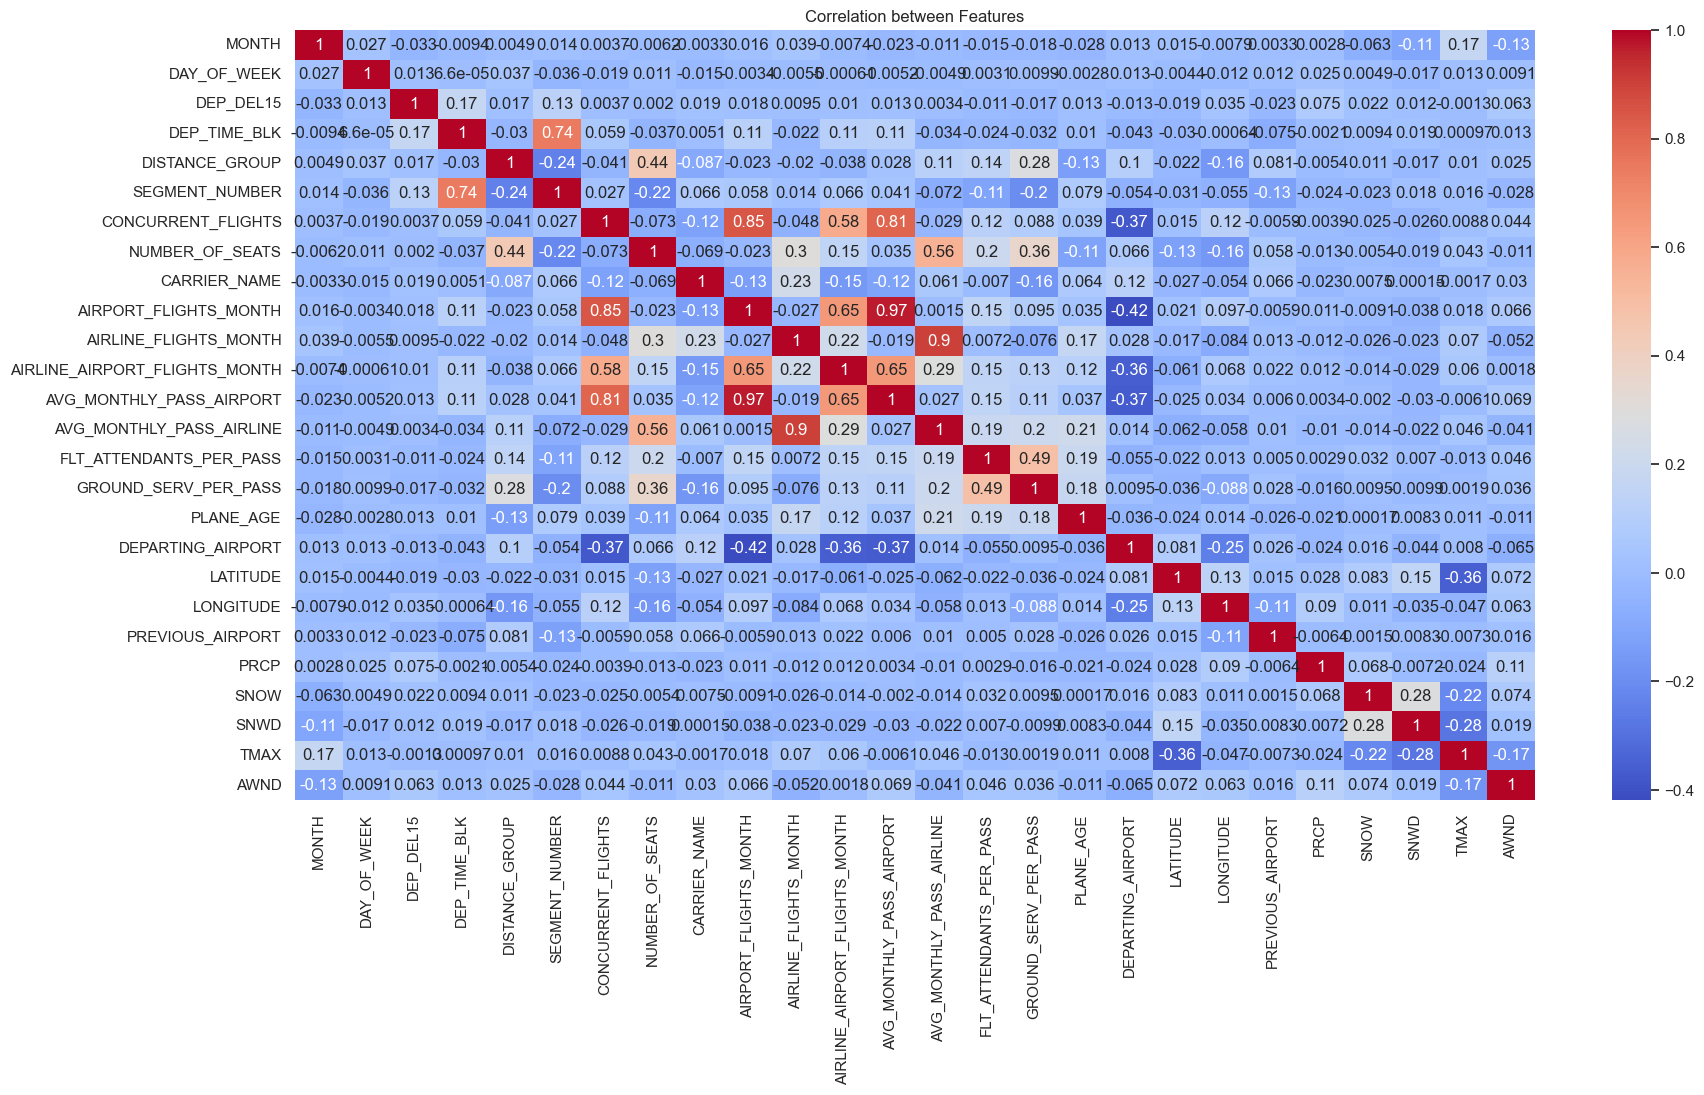

In [5]:
# Plot some heatmaps to see the correlation between the features


def plot_heatmap(df):
    plt.figure(figsize=(20, 10))
    sns.set_theme(style='whitegrid', context='notebook')
    cols = [0, 1, 2]
    sns.heatmap(df.corr(), annot=True, square=False, cmap='coolwarm')
    plt.title('Correlation between Features')
    plt.show()

plot_heatmap(df)

0.81
Cross Validation value is  0.806
[[1608   11]
 [ 369   12]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1619
           1       0.52      0.03      0.06       381

    accuracy                           0.81      2000
   macro avg       0.67      0.51      0.48      2000
weighted avg       0.76      0.81      0.74      2000

0.5123508727561


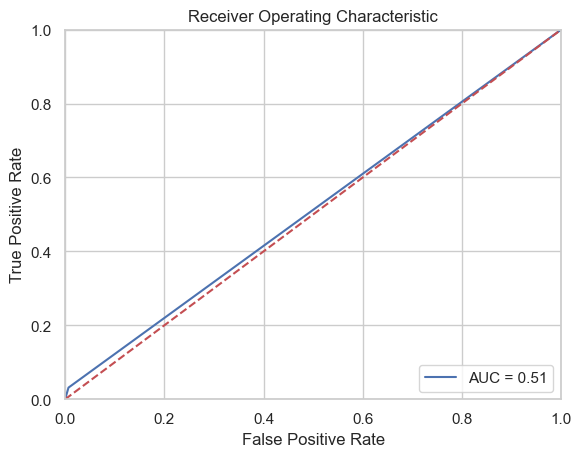

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Split the data into training and testing data
def performTraining(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    weights = (y == 0).sum() / (1.0 * (y == 1).sum())
    rf = RandomForestClassifier(n_estimators=100,class_weight={0: 1, 1: weights},random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(rf ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performTraining(df)

0.786
Cross Validation value is  0.7685
[[1528   91]
 [ 337   44]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1619
           1       0.33      0.12      0.17       381

    accuracy                           0.79      2000
   macro avg       0.57      0.53      0.52      2000
weighted avg       0.73      0.79      0.74      2000

0.5296390143943557


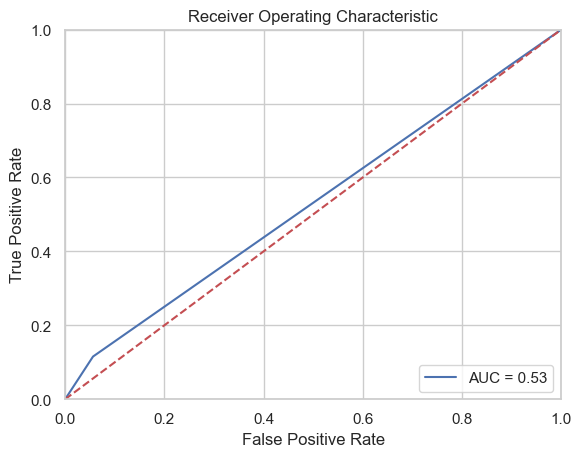

In [ ]:
def performKNearest(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performKNearest(df)



0.7005
Cross Validation value is  0.7185
[[1346  273]
 [ 326   55]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1619
           1       0.17      0.14      0.16       381

    accuracy                           0.70      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.68      0.70      0.69      2000

0.48786717441666305


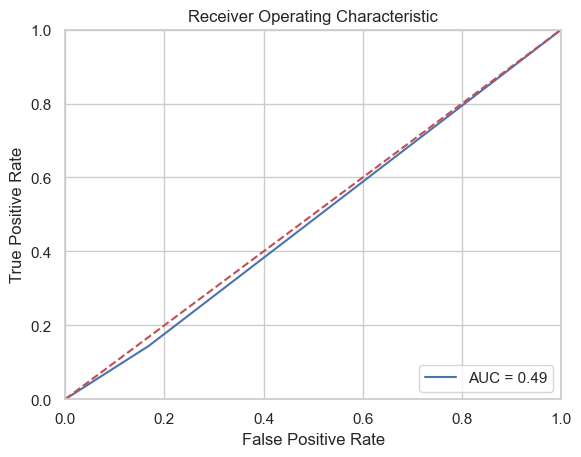

In [8]:
def performSVM(df):
    
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = SVC(C=1.0, kernel='sigmoid', degree=26, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performSVM(df)



0.812
Cross Validation value is  0.798
[[1610    9]
 [ 367   14]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.90      1619
           1       0.61      0.04      0.07       381

    accuracy                           0.81      2000
   macro avg       0.71      0.52      0.48      2000
weighted avg       0.78      0.81      0.74      2000

0.5155932098975584


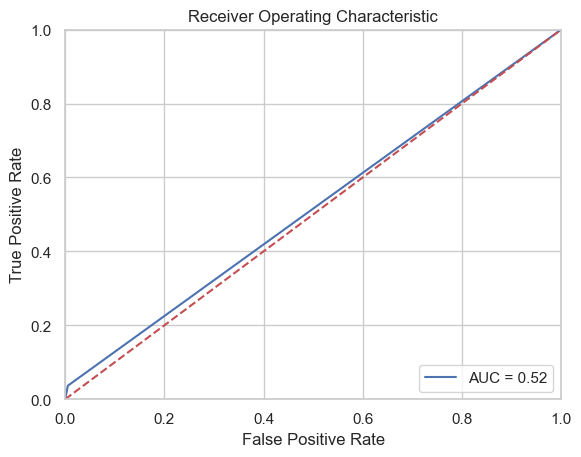

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

def performBoosting(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performBoosting(df)

[LightGBM] [Info] Number of positive: 1559, number of negative: 6441
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1979
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501397 -> initscore=0.005586
[LightGBM] [Info] Start training from score 0.005586
0.7125
[LightGBM] [Info] Number of positive: 305, number of negative: 1295
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1657
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494568 -> initscore=-0.021729
[LightGBM] [Info] Start training from score -0.021729
[LightGB

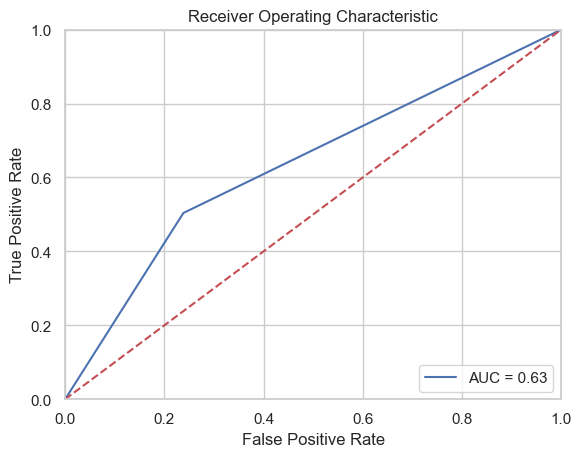

In [68]:
from lightgbm import LGBMClassifier

def performlgbm(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    weights = (y == 0).sum() / (1.0 * (y == 1).sum())
    model = LGBMClassifier(class_weight={0: 1, 1: weights})
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performlgbm(df)


0.8135
Cross Validation value is  0.8030000000000002
[[1606   13]
 [ 360   21]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1619
           1       0.62      0.06      0.10       381

    accuracy                           0.81      2000
   macro avg       0.72      0.52      0.50      2000
weighted avg       0.78      0.81      0.74      2000

0.5235442311526994


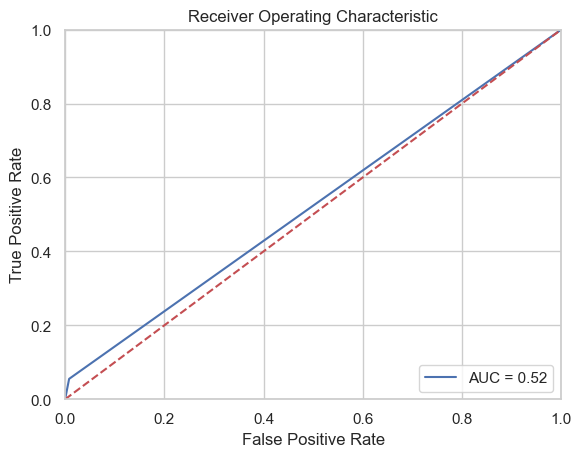

In [67]:
from sklearn.feature_selection import RFE

def performRecursiveFeatureElimination(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = RandomForestClassifier(random_state=42)
    n_features_to_select = 20
    rfe = RFE(model, n_features_to_select=n_features_to_select)
    rfe.fit(X_train, y_train)
    # model.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)



    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performRecursiveFeatureElimination(df)



In [19]:
from sklearn.linear_model import LogisticRegression

def performRegression(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    # scaler = MinMaxScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    model = LogisticRegression(C=1.0,n_jobs=-1,verbose=1, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))


performRegression(df)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


0.8095


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Cross Validation value is  0.8095000000000001
[[1619    0]
 [ 381    0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1619
           1       0.00      0.00      0.00       381

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.66      0.81      0.72      2000

0.5


C:\Users\Fraser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fraser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fraser\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: U

0.7615
Cross Validation value is  0.8035
[[1413  206]
 [ 271  110]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1619
           1       0.35      0.29      0.32       381

    accuracy                           0.76      2000
   macro avg       0.59      0.58      0.59      2000
weighted avg       0.75      0.76      0.75      2000

0.5807374371594533


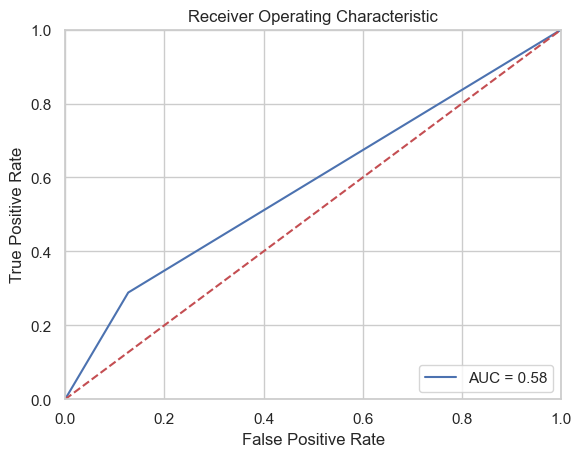

In [63]:
majority_class = df[df['DEP_DEL15'] == 0]
minority_class = df[df['DEP_DEL15'] == 1]


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

def performSMOTE(df):
    X = df.drop('DEP_DEL15', axis=1)
    y = df['DEP_DEL15']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

    over = SMOTE()
    under = RandomUnderSampler()
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)

    X_train, y_train = pipeline.fit_resample(X_train, y_train)
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    print("Cross Validation value is ",np.mean(cross_val_score(model ,X_test,y_test,cv=5)))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(roc_auc_score(y_test, y_pred))
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

performSMOTE(df)

In [42]:
from sklearn.utils import resample
temp = pd.read_csv("n/full_data_flightdelay.csv.xz", compression='xz')
# Separate majority and minority classes
majority_class = temp[temp['DEP_DEL15'] == 0]
minority_class = temp[temp['DEP_DEL15'] == 1]

# Undersample both classes to 5,000 entries each
minority_undersampled = resample(minority_class, 
                                  replace=False,  # Sample without replacement
                                  n_samples=5000,  # 5,000 samples
                                  random_state=42)  # For reproducibility

majority_undersampled = resample(majority_class, 
                                  replace=False,  # Sample without replacement
                                  n_samples=5000,  # 5,000 samples
                                  random_state=42)

# Combine the undersampled classes
balanced_df = pd.concat([minority_undersampled, majority_undersampled])

# Shuffle the resulting dataset (optional, for randomness)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

le = LabelEncoder()

def clean_labels_encoder(list_of_labels, balanced_df):
    for label in list_of_labels:
        balanced_df[label] = le.fit_transform(balanced_df[label])
    return balanced_df

# clean the labels
list_of_labels = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT', 'DEP_TIME_BLK']
balanced_df = clean_labels_encoder(list_of_labels, balanced_df)

# Drop the columns that are not needed
# df = df.drop(['CARRIER_HISTORICAL', 'DEP_AIRPORT_HIST', 'DAY_HISTORICAL',
#        'DEP_BLOCK_HIST'], axis=1)

# Fill the missing values
balanced_df.fillna(balanced_df.mean(), inplace=True)



[LightGBM] [Info] Number of positive: 3987, number of negative: 4013
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1991
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498375 -> initscore=-0.006500
[LightGBM] [Info] Start training from score -0.006500
0.6165
[LightGBM] [Info] Number of positive: 811, number of negative: 789
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1684
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506875 -> initscore=0.027502
[LightGBM] [Info] Start training from score 0.027502
[LightGBM

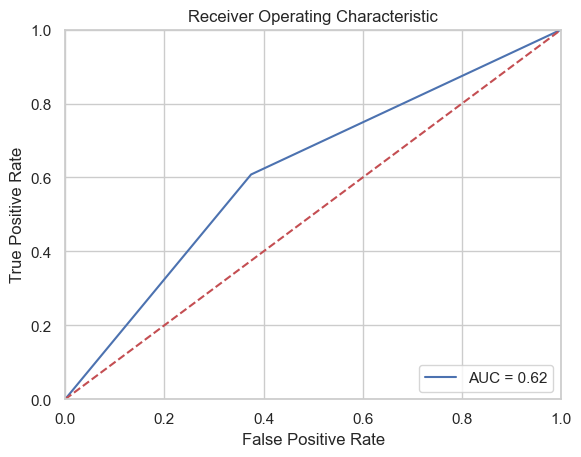

In [69]:
performlgbm(balanced_df)
